In [2]:
! pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 31.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 11.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import sklearn.model_selection as skm
from sklearn.linear_model import LogisticRegression
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# 9.7 Applied Exercises

## Question - 4. Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifer on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

In [46]:
np.random.seed(1)
X = np.random.randn(100,2)
X_df = pd.DataFrame(X, columns = ['X1', 'X2'])
X_df

,X1,X2
0,1.624345,-0.611756
1,-0.528172,-1.072969
2,0.865408,-2.301539
3,1.744812,-0.761207
4,0.319039,-0.249370
...,...,...
95,1.160339,0.369493
96,1.904659,1.111057
97,0.659050,-1.627438
98,0.602319,0.420282


In [58]:
y = np.where(X_df['X1']** 2 - X_df['X2']**2 > 0.5, 1, 0) #NonLinear Decision Boundary
X_df['y'] = y
X_df

,X1,X2,y
0,1.624345,-0.611756,1
1,-0.528172,-1.072969,0
2,0.865408,-2.301539,0
3,1.744812,-0.761207,1
4,0.319039,-0.249370,0
...,...,...,...
95,1.160339,0.369493,1
96,1.904659,1.111057,1
97,0.659050,-1.627438,0
98,0.602319,0.420282,0


In [61]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size = 0.25)

In [65]:
# Training Data with 3 methods. 1)Radial, 2)Polynomial, 3)Linear

rbf_ = SVC(kernel = 'rbf', gamma = 1).fit(X_train, y_train)
poly_ = SVC(kernel = 'poly', degree = 4).fit(X_train, y_train)
lin_ = SVC(kernel = 'linear').fit(X_train, y_train)


results, results_ = {}, {}
results_['rbf'] = rbf_.score(X_train, y_train)
results_['poly'] = poly_.score(X_train, y_train)
results_['lin'] = lin_.score(X_train, y_train)

results['rbf'] = rbf_.score(X_test, y_test)
results['poly'] = poly_.score(X_test, y_test)
results['lin'] = lin_.score(X_test, y_test)

df_results= pd.DataFrame([results_, results], index = ['Accuracy_Train', 'Accuracy_Test'])
df_results

,rbf,poly,lin
Accuracy_Train,0.973333,0.973333,0.746667
Accuracy_Test,1.000000,1.000000,0.800000


<Axes: >

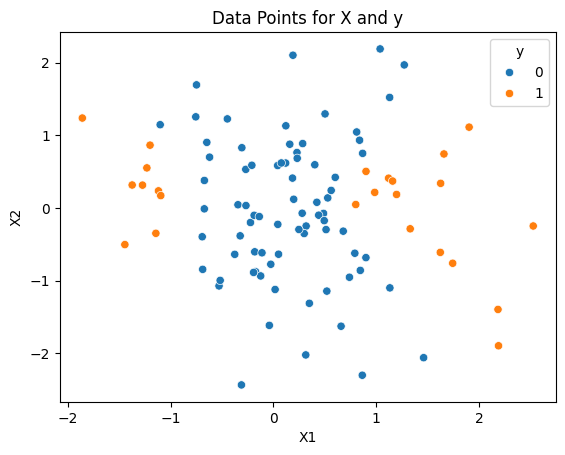

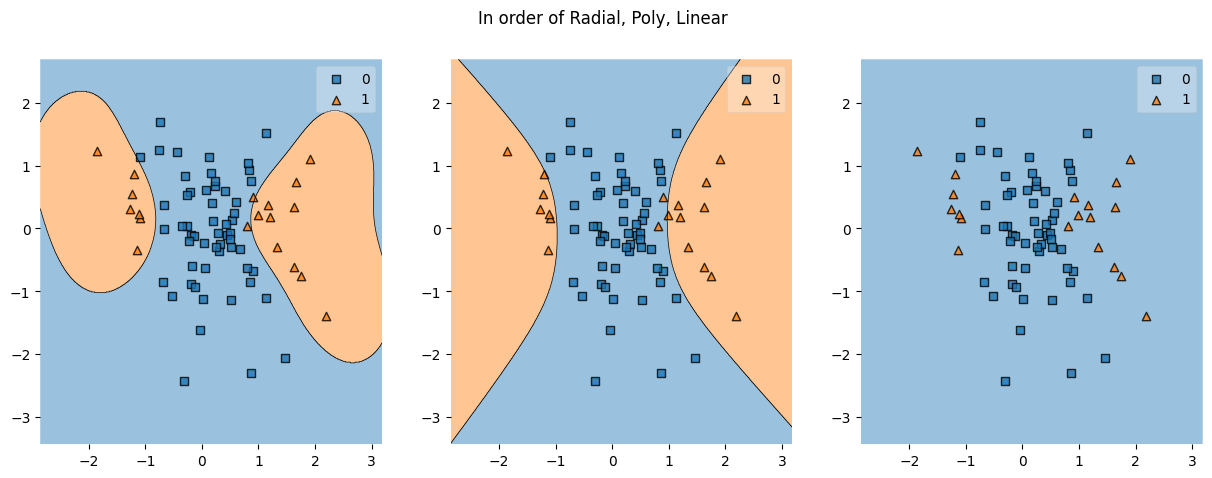

In [75]:
# Seems the methods that are non linear performed the best on the training and on the test
# As expected parametric methods didn't perform as well on the train as the test since normally they slightly overfit since they have high variance
# Now lets graph them

sns.scatterplot(data = X_df, x = 'X1', y = 'X2', hue = 'y')
plt.title('Data Points for X and y')
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize = (15,5), sharey = True)
fig.suptitle('In order of Radial, Poly, Linear')


plot_decision_regions(X_train, np.array(y_train), clf = rbf_, ax = ax1)
plot_decision_regions(X_train, np.array(y_train), clf = poly_, ax = ax2)
plot_decision_regions(X_train, np.array(y_train), clf = lin_, ax = ax3)



In [80]:
# Turn it all into a function
def SVM(X_train, X_test, y_train, y_test, kernel, degree, gamma, C):
  model = SVC(kernel = kernel, degree = degree, gamma = gamma , C= C).fit(X_train, y_train)
  print(f'Training Accuracy: {model.score(X_train, y_train)}')
  print(f'Test Accuracy: {model.score(X_test,y_test)}')
  fig,ax = plt.subplots(figsize = (10,5))
  ax.set_title(f'Decision Boundary for {kernel} kernel')
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  plot_decision_regions(X_train, np.array(y_train), clf = model, ax = ax)




Training Accuracy: 0.9733333333333334
Test Accuracy: 1.0
Training Accuracy: 0.9733333333333334
Test Accuracy: 1.0
Training Accuracy: 0.7466666666666667
Test Accuracy: 0.8


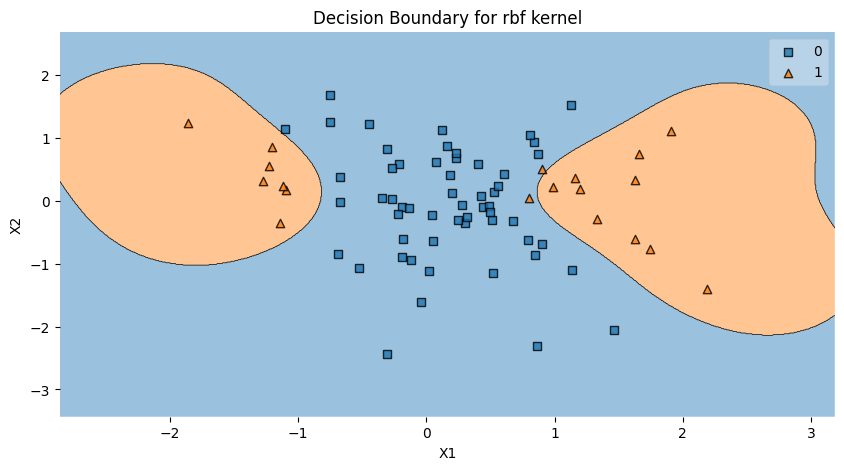

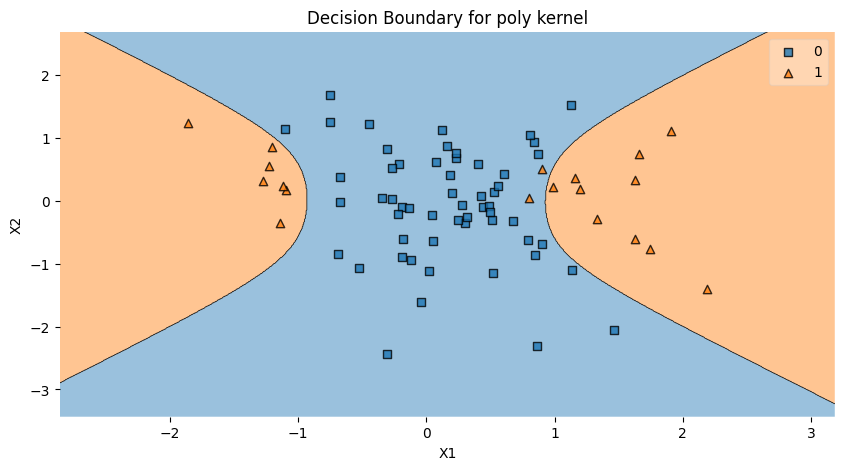

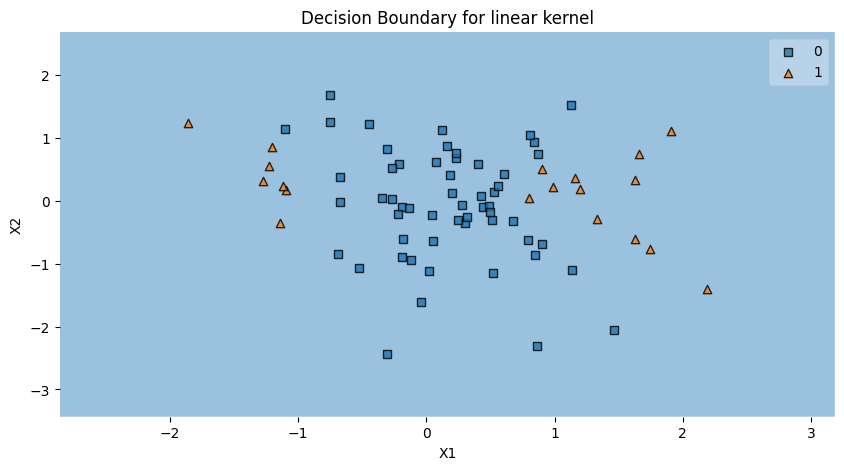

In [82]:
SVM(X_train, X_test, y_train, y_test, 'rbf', 1, 1, 1)
SVM(X_train, X_test, y_train, y_test, 'poly', 4, 1, 1)
SVM(X_train, X_test, y_train, y_test, 'linear', 1, 1, 1)


In [84]:
# Now that is niceeeee

## Question - 5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classifcation using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

### (a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows

In [102]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
X_df = pd.DataFrame({'X1': x1, 'X2': x2})
X_df

,X1,X2
0,0.305003,-0.256576
1,0.307941,0.211346
2,0.015326,0.208829
3,-0.214199,-0.078177
4,-0.446069,-0.040580
...,...,...
495,-0.094687,0.289493
496,-0.259470,-0.444608
497,-0.080933,-0.335240
498,0.181635,0.382872


In [103]:
X_df['y'] = np.where(X_df['X1']**2 - X_df['X2']**2 > 0, 1, 0)
X_df

,X1,X2,y
0,0.305003,-0.256576,1
1,0.307941,0.211346,1
2,0.015326,0.208829,0
3,-0.214199,-0.078177,1
4,-0.446069,-0.040580,1
...,...,...,...
495,-0.094687,0.289493,0
496,-0.259470,-0.444608,0
497,-0.080933,-0.335240,0
498,0.181635,0.382872,0


In [104]:
X_df['y'].value_counts()

y
1    253
0    247
Name: count, dtype: int64

### (b) Plot the observations, colored according to their class labels. Your plot should display $X_{1}$ on the x-axis, and $X_{2}$ on the y axis.

Text(0.5, 1.0, 'Data Points for X and Y')

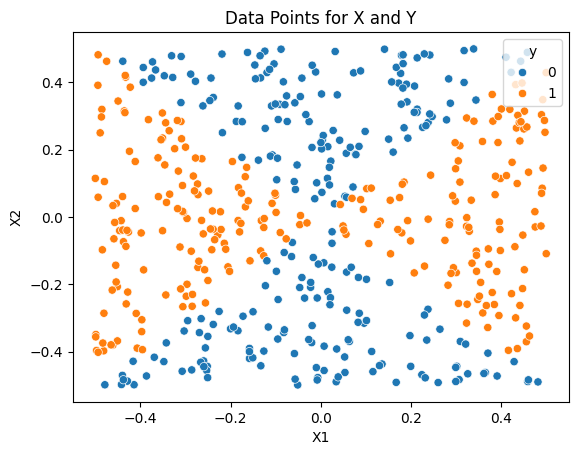

In [105]:
sns.scatterplot(data = X_df, x = 'X1',y = 'X2', hue = 'y')
plt.title('Data Points for X and Y')

### (c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [106]:
log = LogisticRegression().fit(X_df[['X1','X2']], X_df['y'])
score = log.score(X_df[['X1','X2']], X_df['y'])
print(f'The LogisticRegression error rate {score}')

The LogisticRegression error rate 0.43


### (d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

In [113]:
X_train, X_test, y_train, y_test = skm.train_test_split(X_df[['X1', 'X2']], X_df['y'], test_size = 0.5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(-1.0, 1.0)

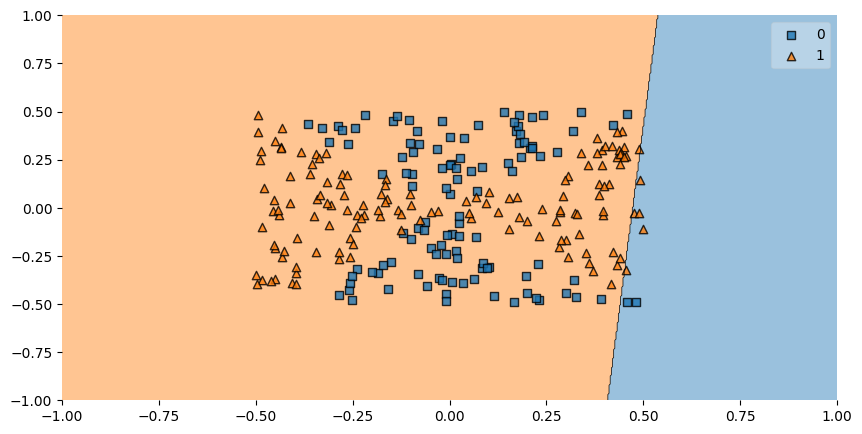

In [115]:
lg_train = LogisticRegression().fit(X_train, y_train)
plt.figure(figsize = (10,5))
plot_decision_regions(np.array(X_train), np.array(y_train), clf = lg_train)
plt.xlim(-1,1)
plt.ylim(-1,1)

In [116]:
# Not a very great decision boundary and we can see that from the score of the model
score = lg_train.score(X_train, y_train)
print(f'The LogisticRegression error rate {score} on training data')

The LogisticRegression error rate 0.54 on training data


### (e) Now fit a logistic regression model to the data using non-linear functions of $X_{1} and $X_{2} as predictors.

In [117]:
X_df['X1^2'] = X_df['X1']**2
X_df['X2^2'] = X_df['X2']**2
X_df['X1X2'] = X_df['X1']* X_df['X2']
X_df

,X1,X2,y,X1^2,X2^2,X1X2
0,0.305003,-0.256576,1,0.093027,0.065831,-0.078257
1,0.307941,0.211346,1,0.094828,0.044667,0.065082
2,0.015326,0.208829,0,0.000235,0.043610,0.003200
3,-0.214199,-0.078177,1,0.045881,0.006112,0.016745
4,-0.446069,-0.040580,1,0.198978,0.001647,0.018101
...,...,...,...,...,...,...
495,-0.094687,0.289493,0,0.008966,0.083806,-0.027411
496,-0.259470,-0.444608,0,0.067324,0.197676,0.115362
497,-0.080933,-0.335240,0,0.006550,0.112386,0.027132
498,0.181635,0.382872,0,0.032991,0.146591,0.069543


### (f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)–(e) until you come up with an example in which the predicted class labels are obviously non-linear.

In [141]:
X_train_, X_test_, y_train_, y_test_ = skm.train_test_split(X_df.drop('y', axis = 1), X_df['y'], test_size = 0.25)

<Axes: xlabel='X1', ylabel='X2'>

<Figure size 1000x500 with 0 Axes>

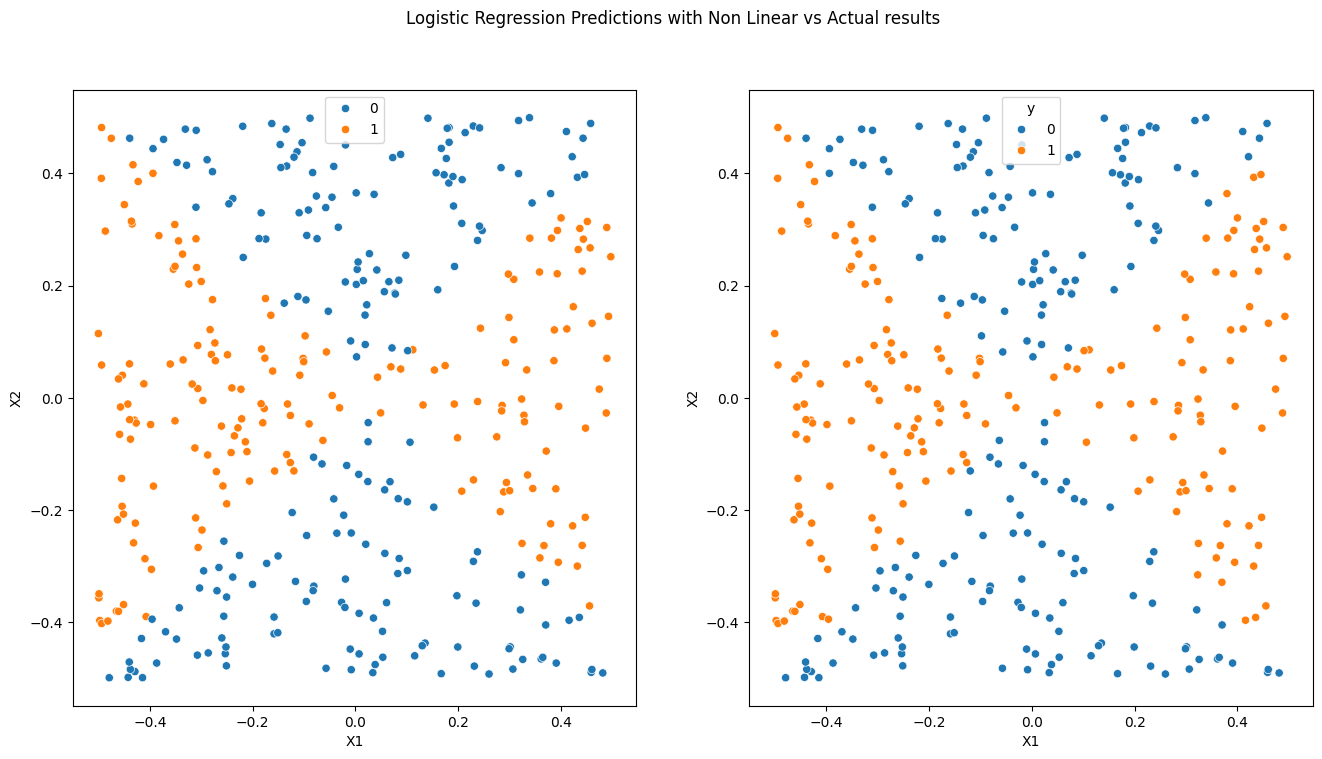

In [142]:
lr = LogisticRegression().fit(X_train_, y_train_)
plt.figure(figsize = (10,5))
pred = lr.predict(X_train_)
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (16,8))
fig.suptitle('Logistic Regression Predictions with Non Linear vs Actual results')
sns.scatterplot(data = X_train_, x = 'X1', y = 'X2', hue = pred, ax = ax1)
sns.scatterplot(data = X_train_, x = 'X1', y = 'X2', hue = y_train_, ax = ax2)


In [143]:
# We can see the linear decision boundary is obviously non linear
# We can also see it decentlys predicts the actual outcome with good accuracy.
# Here is the exact accuracy

print(f'Logistic Regression Accuracy Score {lr.score(X_test_, y_test_)}')

Logistic Regression Accuracy Score 0.968


In [129]:
# Much improved from the 0.43 above

### (g) Fit a support vector classifer to the data with $X_{1}$ and $X_{2}$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

In [144]:
X_train, X_test, y_train, y_test = skm.train_test_split(X_df[['X1', 'X2']], X_df['y'], test_size = 0.25)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

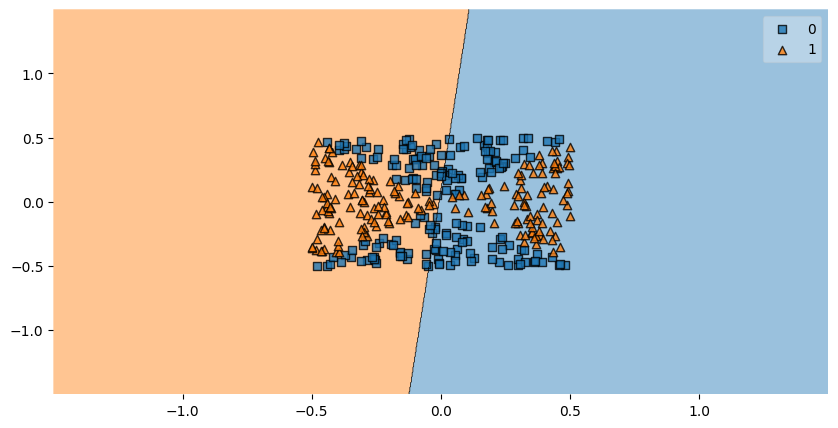

In [145]:
svm = SVC(kernel = 'linear').fit(X_train, y_train)
pred = svm.predict(X_train)
fig, ax = plt.subplots(figsize = (10,5))
plot_decision_regions(np.array(X_train), np.array(y_train), clf = svm, ax = ax)

In [146]:
# Not a great fit
# Lets see the accuracy of the model
print(f'SVM Accuracy Score {svm.score(X_test, y_test)}')

SVM Accuracy Score 0.52


In [133]:
# Better than the orginal Logistic Regression before we made the variables non linear

### (h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

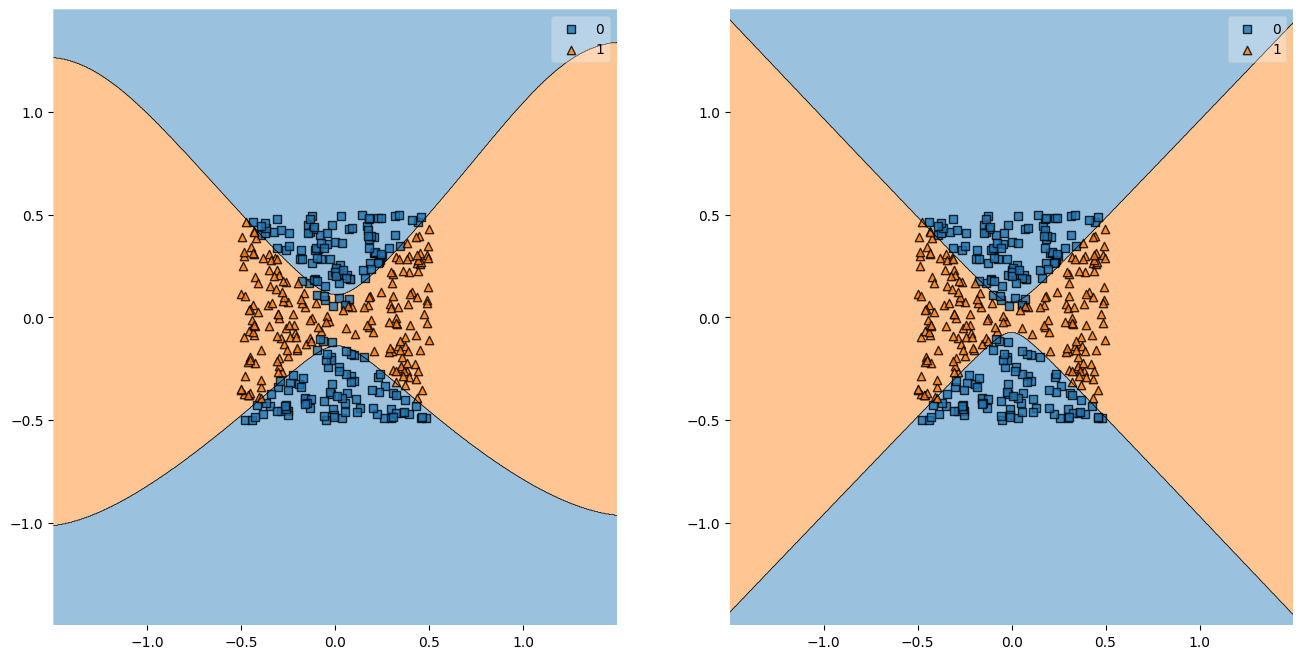

In [150]:
svm_rbf = SVC(kernel = 'rbf', gamma = 1).fit(X_train, y_train)
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (16,8))
plot_decision_regions(np.array(X_train), np.array(y_train), clf = svm_rbf, ax = ax1)
svm_poly = SVC(kernel = 'poly', degree = 2).fit(X_train, y_train)
plot_decision_regions(np.array(X_train), np.array(y_train), clf = svm_poly, ax = ax2)

In [151]:
# This model is much more accurate. Lets see how well its prediction accuracy is.
print(f'SVM with radial prediction accuracy on train {svm_rbf.score(X_train, y_train)}')
print(f'SVM with poly degree 2 prediction accuracy on train {svm_poly.score(X_train, y_train)}')



print(f'Logistic Regression Accuracy Score {lr.score(X_test_, y_test_)}')
print(f'SVM Actual Score using Radial Kernel {svm_rbf.score(X_test, y_test)}')
print(f'SVM ACtualy Score using Poly Degree 2 Kernel {svm_poly.score(X_test, y_test)}')

SVM with radial prediction accuracy on train 0.96
SVM with poly degree 2 prediction accuracy on train 0.976
Logistic Regression Accuracy Score 0.968
SVM Actual Score using Radial Kernel 0.912
SVM ACtualy Score using Poly Degree 2 Kernel 0.96


In [136]:
# Much higher than the previous .52

### (i) Comment on your results.

* We can see when dealing with non linear decision boundaries we can either
> 1. Change the variables and make them non linear then fit the model
> 1. Fit a non linear model like SVM with a kernel of radial or polynomial

* Both of these significantly improved the results from a linear decision boundary on a non linear decision boundary problem

* Also both methods scored pretty much equally so I think for a non linear decision boundary you can adjust the variables or use a non linear method. Just need to make sure the variable adjustment or the non linear selection is the best possible selection. I'd suggest looking at the scatter plot and using cross validation.

## Question 6. At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifer with a small value of C that misclassifes a couple of training observations may perform better on test data than one with a huge value of C that does not misclassify any training observations. You will now investigate this claim.